## What is Human Action Recognition(HAR)?

- Human activity recognition, or HAR for short, is a broad field of study concerned with identifying the specific movement or action of a person based on sensor data.
- Movements are often typical activities performed indoors, such as walking, talking, standing, and sitting

## Why it is important ?
- Human activity recognition plays a significant role in human-to-human interaction and interpersonal relations.
- Because it provides information about the identity of a person, their personality, and psychological state, it is difficult to extract.
- The human ability to recognize another person’s activities is one of the main subjects of study of the scientific areas of computer vision and machine learning. As a result of this research, many applications, including video surveillance systems, human-computer interaction, and robotics for human behavior characterization, require a multiple activity recognition system.

## Below are some practical applications of HAR:

![man boxing](./images/punching.gif)

Here we can see that the AI is able to identify what the man in the video is doing. This might raise the question of importance of identification of the action. Let's look at another example below:

![running in classroom](./images/har_run.gif)

Here we can see that the model is able to identify the troublesome student who is running in the classroom highlighted in red. Whereas the other kids who are walking normally are colored in green. 

This is a just small example of the endless applications that can help us automate monotonous and dangerous jobs.

## What is a CNN?

A convolutional neural network (CNN) is a type of artificial neural network used in image recognition and processing that is specifically designed to process pixel data.

CNNs are powerful image processing, artificial intelligence (AI) that use deep learning to perform both generative and descriptive tasks, often using machine vison that includes image and video recognition, along with recommender systems and natural language processing (NLP).

![cnn](./images/cnn.jpeg)

## VGG16

VGG-16 is a convolutional neural network that is 16 layers deep. You can load a pretrained version of the network trained on more than a million images from the ImageNet database. The pretrained network can classify images into 1000 object categories, such as keyboard, mouse, pencil, and many animals. As a result, the network has learned rich feature representations for a wide range of images. The network has an image input size of 224-by-224.

![vgg16](./images/vgg16.png)

## What is Transfer Learning

Transfer learning is a machine learning method where a model developed for a task is reused as the starting point for a model on a second task. It is a popular approach in deep learning where pre-trained models are used as the starting point on computer vision and natural language processing tasks given the vast compute and time resources required to develop neural network models on these problems and from the huge jumps in skill that they provide on related problems.

![transfer learning](./images/transfer.jpeg)

## HAR using Transfer Learning

## Imports

In [35]:
import os
import glob

#imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

#Scikit Learn
from sklearn.model_selection import train_test_split

#Image processing
import cv2 as cv

#tensorflow 
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Activation, Dropout, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [36]:
#Dataframe classifying the actions
train_action = pd.read_csv("data/Training_set.csv")
test_action = pd.read_csv("data/Testing_set.csv")

In [37]:
train_action.head()

,filename,label
0,Image_1.jpg,sitting
1,Image_2.jpg,using_laptop
2,Image_3.jpg,hugging
3,Image_4.jpg,sleeping
4,Image_5.jpg,using_laptop


## Looking at the data

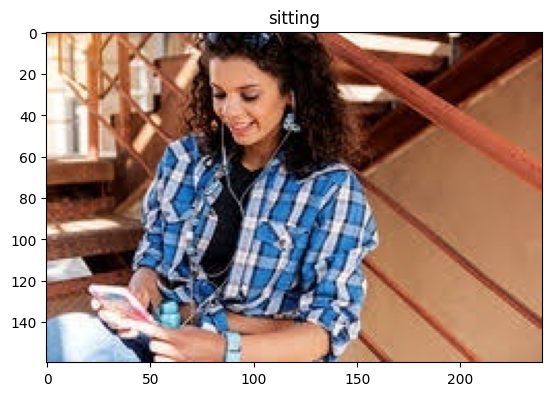

In [38]:
#Printing the images along with their respective action

img = cv.imread('data/train/' + train_action.filename[0])
plt.title(train_action.label[0])
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB));

In [39]:
test_action.shape

(5400, 1)

There are 12,600 images in the training dataset. Creating a function which will randomly sample a image from the set and print the image along with its labeled action.

In [40]:
#Sample images and their labels in the training data


def show_img_train():
    img_num = np.random.randint(0,12599)
    img = cv.imread('data/train/' + train_action.filename[img_num])
    plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    plt.title(train_action.label[img_num])

def show_img_test():
    img_num = np.random.randint(0,5399)
    img = cv.imread('data/test/' + test_action.filename[img_num])
    plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

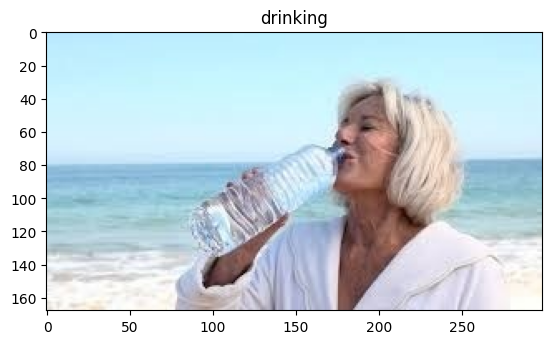

In [41]:
show_img_train()

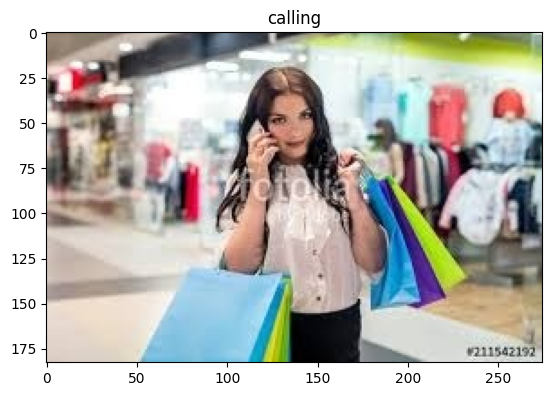

In [42]:
show_img_train()

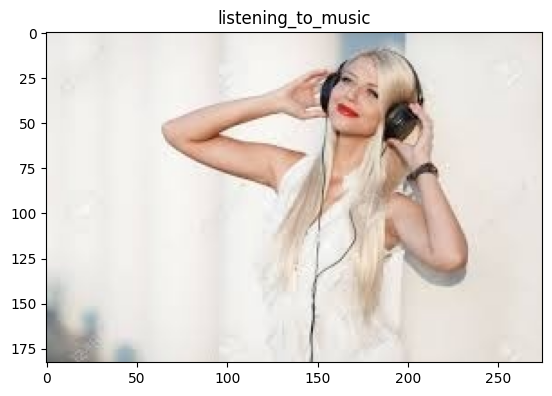

In [43]:
show_img_train()

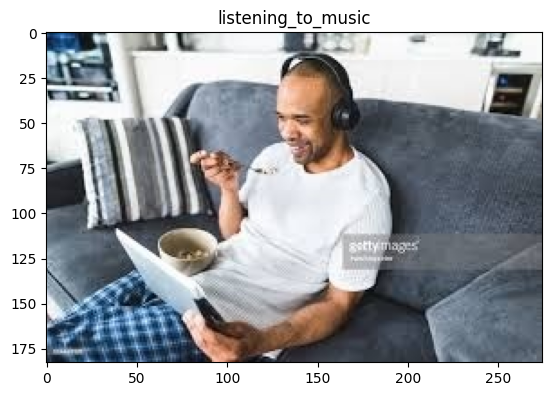

In [44]:
show_img_train()

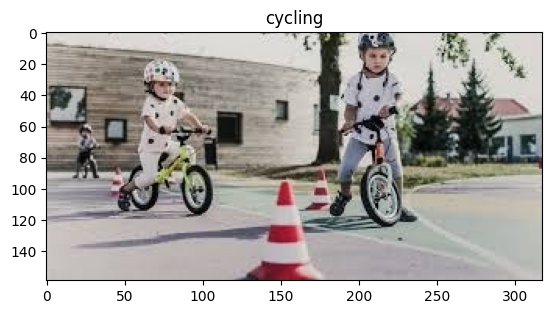

In [45]:
show_img_train()

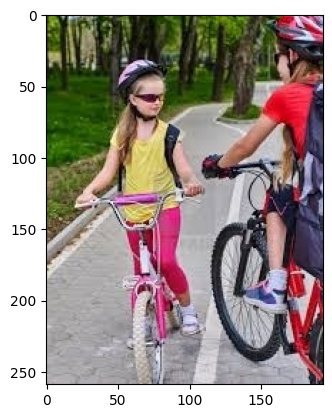

In [46]:
show_img_test()

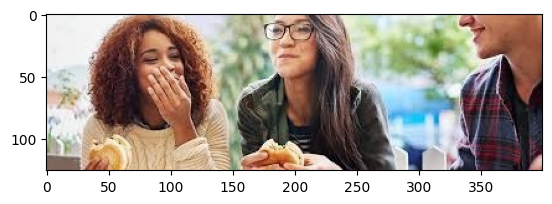

In [47]:
show_img_test()

Note that the images from the test set do not contain the labels. That is for the model to predict.

## Plotting the label classes

### Pie chart

In [48]:
# Corrected code for plotting the pie chart
l = train_action.label.value_counts()  # Aggregated counts for each label
fig = px.pie(values=l.values, names=l.index, title='Distribution of Human Activity')
fig.show()

### Value counts

In [49]:
train_action.label.value_counts()

label
sitting               840
using_laptop          840
hugging               840
sleeping              840
drinking              840
clapping              840
dancing               840
cycling               840
calling               840
laughing              840
eating                840
fighting              840
listening_to_music    840
running               840
texting               840
Name: count, dtype: int64

The output classes for the image classification are balanced. This reduces a step in pre-processing which deals with imbalanced classes using techniques such as SMOTE, under-sampling, etc.

## Preprocessing

(160, 240, 3)


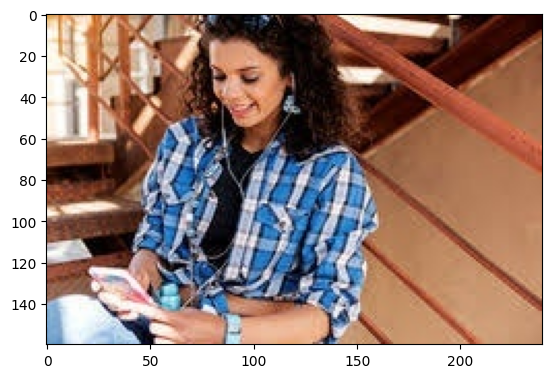

In [50]:
img = cv.imread('data/train/' + train_action.filename[0])

#OpenCV reads the images in BGR instead of the standard RGB, hence the below line of code

plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB));
print(img.shape)

The inputs for VGG16 model as per the Tensorflow documentation is 224x224. Here out training set images come in all different sizes. We need to resize the images.

### Create the directory for resized images 

Skipping the below cell since the folder has already been created.

In [19]:
#create resized directory in the current project folder
parent_dir = os.getcwd()
directory = 'resized-train'
path = os.path.join(parent_dir, directory)
os.mkdir(path)
print('Created "resized-train" folder')

Created "resized-train" folder


## Resize the training images

In [20]:
#dimensions
width = 224
height = 224
dim = (width, height)

#resizing all the images in the train folder
for i in np.arange(len(train_action.filename)):    
    #read the filename from the dataframe
    filename = train_action.filename.iloc[i]
    #read the image from the train folder
    img = cv.imread('data/train/' + filename)
    #resize the image
    resized = cv.resize(img, dim, interpolation = cv.INTER_AREA)
    #write the image in resized folder
    cv.imwrite('./resized-train/' + filename ,resized)

## Resize the test set images

In [21]:
#create resized directory in the current project folder
parent_dir = os.getcwd()
directory = 'resized-test'
path = os.path.join(parent_dir, directory)
os.mkdir(path)
print('Created "resized-test" folder')

Created "resized-test" folder


In [22]:
#resizing all the images in the train folder
for i in np.arange(len(test_action.filename)):    
    #read the filename from the dataframe
    filename = test_action.filename.iloc[i]
    #read the image from the train folder
    img = cv.imread('data/test/' + filename)
    #resize the image
    resized = cv.resize(img, dim, interpolation = cv.INTER_AREA)
    #write the image in resized folder
    cv.imwrite('./resized-test/' + filename ,resized)

## Pre-processing

### Display image

(224, 224, 3)


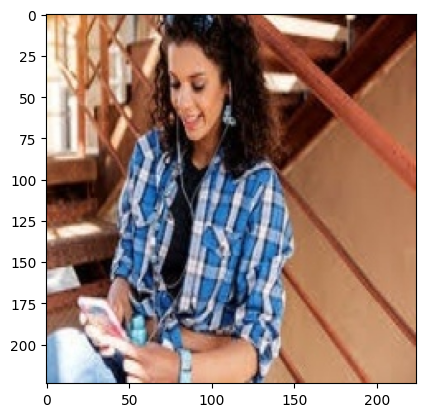

In [51]:
img = cv.imread('resized-train/' + train_action.filename[0])
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
print(img.shape)

We can see that the images have been resized and stored in a different directory. This helps us avoid resizing the images everytime we run the notebook.

## Read images and convert them into numpy arrays

## X

In [52]:
#empty list train
X = []

#reading all the resized images
for i in np.arange(len(train_action.filename)): 
    img = cv.imread('resized-train/' + train_action.filename[i])
    X.append(img)

X = np.asarray(X)
X.shape

(12600, 224, 224, 3)

## y

In [53]:
y = np.asarray(pd.get_dummies(train_action.label))
print(y.shape)

(12600, 15)


## Test train Split

In [54]:
print(X.shape,y.shape)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1, random_state=42,stratify=train_action.label)

(12600, 224, 224, 3) (12600, 15)


In [55]:
print(X_train.shape,y_train.shape)

(11340, 224, 224, 3) (11340, 15)


## Unseen test set

This set of images are meant to be submitted on Kaggle. We wont be using this data for this project.

In [56]:
#empty list test
X_unseen = []

#reading all the resized images
for i in np.arange(len(test_action.filename)): 
    img = cv.imread('resized-test/' + test_action.filename[i])
    X_unseen.append(img)

X_unseen = np.asarray(X_unseen)
X_unseen.shape

(5400, 224, 224, 3)

## Building the CNN model using transfer learning

### Initializing a VGG16 model

In [57]:
#Sequential model constructor
cnn_model = Sequential()

#initializing a vgg16 wihtout the top layers 
pretrained_model= tf.keras.applications.VGG16(include_top=False,
                   input_shape=(224,224,3),
                   pooling='avg',classes=15,
                   weights='imagenet')

#Freezing the deeper layers
for layer in pretrained_model.layers:
        layer.trainable=False
        
#adding our layers to the model
cnn_model.add(pretrained_model)
cnn_model.add(Flatten())
cnn_model.add(Dense(512, activation='relu'))
cnn_model.add(Dense(15, activation='softmax'))

## Model Summary

- The loss function that we are trying to minimize is Categorical Cross Entropy. This metric is used in multiclass classification. This is used alongside softmax activation function.
 
- Adam is an optimization algorithm that can be used instead of the classical stochastic gradient descent procedure to update network weights iterative based in training data. This algorithm is straight forward to implement and computationally efficient.

In [58]:
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
cnn_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 512)            │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 15)             │         7,695 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,985,039 (57.16 MB)

 Trainable params: 270,351 (1.03 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

## Training the model

In [59]:
history = cnn_model.fit(X_train,y_train, epochs=60)

Epoch 1/60
199/355 ━━━━━━━━━━━━━━━━━━━━ 16:19 6s/step - accuracy: 0.3946 - loss: 3.2712

KeyboardInterrupt: 

## Save the model weights

In [ ]:
#Saving the trained weights and new
cnn_model.save_weights('./model/cnn_model.weights.h5')

ValueError: The filename must end in `.weights.h5`. Received: filepath=./model/cnn_model.h5

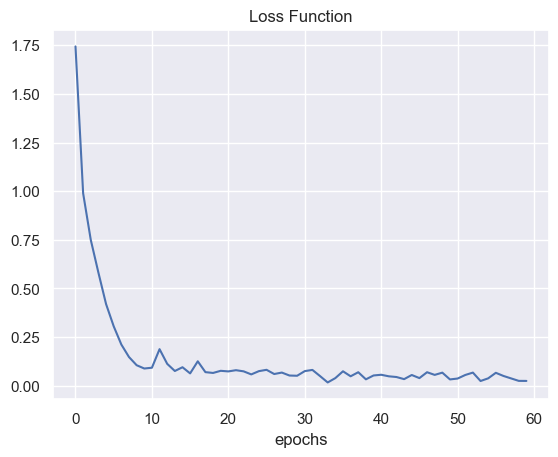

In [44]:
#plotting the loss
loss = history.history['loss']

plt.title("Loss Function")
plt.xlabel("epochs")
sns.set_theme(style='darkgrid')
sns.lineplot(loss);

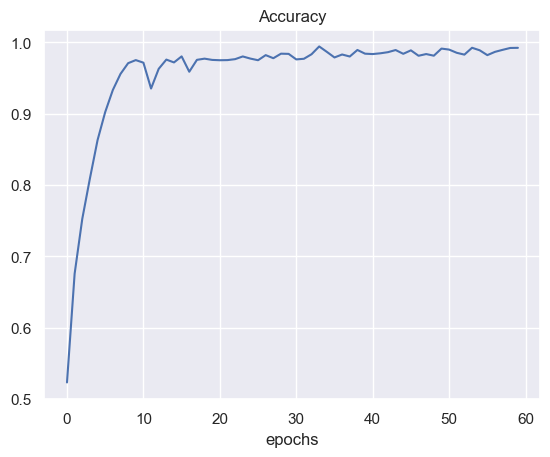

In [45]:

plt.title("Accuracy")
plt.xlabel("epochs")
accu = history.history['accuracy']
sns.lineplot(accu);

## Predictions

In [36]:
y_preds = cnn_model.predict(X_test)


 1/40 [..............................] - ETA: 6s

2022-09-28 05:42:41.048203: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


40/40 [==============================] - 9s 231ms/step


## Accuracy and Log Loss

In [41]:
from sklearn.metrics import accuracy_score, log_loss

print('Log Loss:',log_loss(np.round(y_preds),y_test))
print('Accuracy:',accuracy_score(np.round(y_preds),y_test))

Log Loss: 12.417512465789333
Accuracy: 0.6317460317460317


## Visualizing the predictions

In [58]:
from PIL import Image
import matplotlib.image as mimg

#reading image and resize 
def read_image(fn):
    image = Image.open(fn)
    return np.asarray(image.resize((224,224)))

#predict the class and the confidence of the prediction
def test_predict(test_image):
    result = cnn_model.predict(np.asarray([read_image(test_image)]))

    itemindex = np.where(result==np.max(result))
    prediction = itemindex[1][0]
    print("probability: "+str(np.max(result)*100) + "%\nPredicted class : ", prediction)

    image = mimg.imread(test_image)
    plt.imshow(image)
    plt.title(prediction)

1/1 [==============================] - 0s 16ms/step
probability: 99.9189555644989%
Predicted class :  13


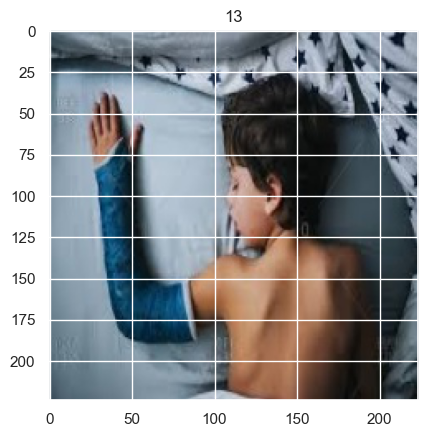

In [59]:
#Image 1
filename = test_action.filename.iloc[0]
test_predict('./resized-test/' + filename)

1/1 [==============================] - 0s 16ms/step
probability: 92.20871925354004%
Predicted class :  8


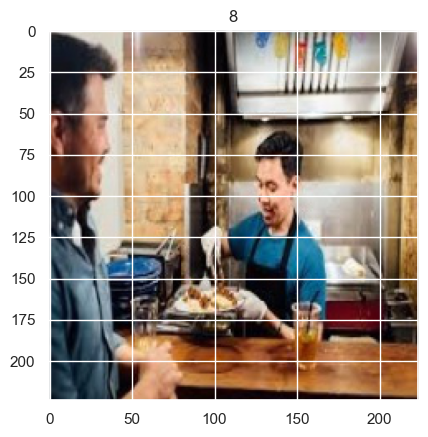

In [60]:
#Image 2
filename = test_action.filename.iloc[1]
test_predict('./resized-test/' + filename)

## Next Steps and Recommendations


- In order to improve the accuracy, we can unfreeze few more layers and retrain the model. This will help us further improve the model.

- We can tune the parameters using KerasTuner.

- The model reached a good accuracy score after the 20 epochs but it has been trained for 60 epochs. There is definitely some overfitting which can avoided with early stopping.

- The nodes in the deep layers were connected. We can introduce some amount dropout for regularization.